<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Multinomial_logistic_regression_for_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloaded dataset from Kaggle

https://www.kaggle.com/brynja/wineuci

In [2]:
!kaggle datasets download -d brynja/wineuci

  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 5.03MB/s]


In [3]:
!unzip wineuci.zip

Archive:  wineuci.zip
  inflating: Wine.csv                


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

##Loading Dataset

In [5]:
df = pd.read_csv('Wine.csv')

df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## Fill in the header content

This dataset doesn't have headers in the dataframe, so I filled in the header content based on kaggle documentation.





Pandas uses the **names** parameter in the read_csv function to explicitly specify the column names.

* Without names Parameter:

If you don't provide the names parameter, pandas will assume that the first row in the CSV file contains the column headers. It will use those values as the names for the columns.

* With names Parameter:

When you provide the names parameter, pandas interprets this as an explicit instruction to use the provided names as column headers. It will ignore the first row in the CSV file and use the names you provided.

In [6]:
df = pd.read_csv('Wine.csv', names=[
  'name'
  ,'alcohol'
  ,'malicAcid'
  ,'ash'
  ,'ashalcalinity'
  ,'magnesium'
  ,'totalPhenols'
  ,'flavanoids'
  ,'nonFlavanoidPhenols'
  ,'proanthocyanins'
  ,'colorIntensity'
  ,'hue'
  ,'od280_od315'
  ,'proline'
])

df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Preview of dataset (number of wines for each category)

<Axes: xlabel='name', ylabel='count'>

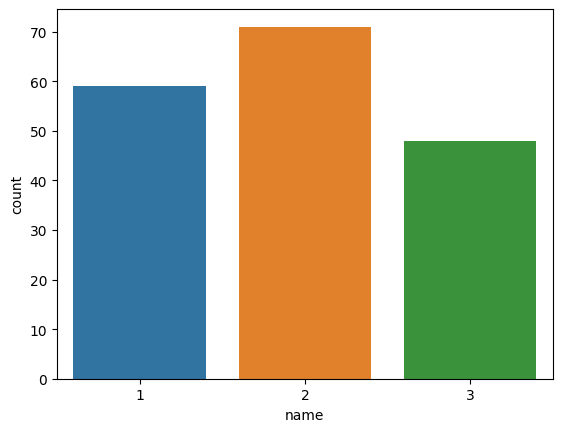

In [7]:
sns.countplot(x=df['name'])

## Data Preprocessing

1. find null or na values
2. remove rows with null value

In [8]:
print(df.isnull().sum())

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


### Divided dataset into x & y


In [9]:
x_data = df.drop(columns=['name'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y_data = df[['name']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,name
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### Standardization

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

z = (x - u) / s

z = (x - average) / standard deviation

In [19]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[ 1.5186119  -0.5622497   0.2320528  -1.1695931   1.9139051   0.8089973
  1.0348189  -0.65956306  1.2248839   0.2517168   0.3621771   1.8479197
  1.013009  ]


### One-hot encoding

Performed One-hot encoding for y-value

* 1 -> [1, 0, 0]
* 2 -> [0, 1, 0]
* 3 -> [0, 0, 1]

One-hot encoding is needed for multi-label classification

In [25]:
encoder = OneHotEncoder()
y_data_encoded = encoder.fit_transform(y_data).toarray()

# check for first item => should be [1, 0, 0] since 1
print(y_data.values[0])
print(y_data_encoded[0])

# check for 173th item => should be [0, 0, 1] since 3
print(y_data.values[172])
print(y_data_encoded[172])

[1.]
[1. 0. 0.]
[3.]
[0. 0. 1.]


### Dataset Splitting
80% for Training Data, 20% for Validation Data

*Need to use x_data_scaled & y_data_encoded

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(142, 13) (36, 13)
(142, 3) (36, 3)


## Training Model

```
model = Sequential([
  Dense(3, activation='softmax')
])
```
Above defines a neural network model with one layer.
The layer is a dense layer with 3 units (neurons).
The activation function used in this layer is softmax, which is commonly used for multi-class classification tasks. It outputs probabilities for each class, which is 3 outputs in this case.

loss='categorical_crossentropy': This is the loss function used for training a multi-class classification model.

optimizer=Adam(learning_rate=0.02): The optimizer is Adam, which is a popular optimization algorithm. The learning rate is set to 0.02.

metrics=['acc']: During training, the model will monitor and display the accuracy.

In [28]:
model = Sequential([
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=20
)

Epoch 1/20
5/5 [==============================] - 1s 53ms/step - loss: 1.2086 - acc: 0.4085 - val_loss: 1.2351 - val_acc: 0.5833
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.7316 - acc: 0.6831 - val_loss: 0.9314 - val_acc: 0.6389
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.4644 - acc: 0.8310 - val_loss: 0.7684 - val_acc: 0.7778
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 0.3325 - acc: 0.8803 - val_loss: 0.6649 - val_acc: 0.7778
Epoch 5/20
5/5 [==============================] - 0s 18ms/step - loss: 0.2507 - acc: 0.9085 - val_loss: 0.5820 - val_acc: 0.8056
Epoch 6/20
5/5 [==============================] - 0s 45ms/step - loss: 0.1968 - acc: 0.9507 - val_loss: 0.5165 - val_acc: 0.8056
Epoch 7/20
5/5 [==============================] - 0s 43ms/step - loss: 0.1605 - acc: 0.9648 - val_loss: 0.4702 - val_acc: 0.8333
Epoch 8/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1391 - acc: 0.9718 - val

Accuracy is 1.0 or 100% for training set!

While val_acc is 0.9167, this means that when we provide new and unknown y value, the model will classify it correctly by about 92%.